In [1]:
#Loading Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

In [2]:
# Loading the iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
                                          'petal width (cm)', 'Species'])

df.head() # To view first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# To know number of rows and collumns
df.shape

(150, 5)

In [4]:
# Check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# To find if any null value is present
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [6]:
# To see summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


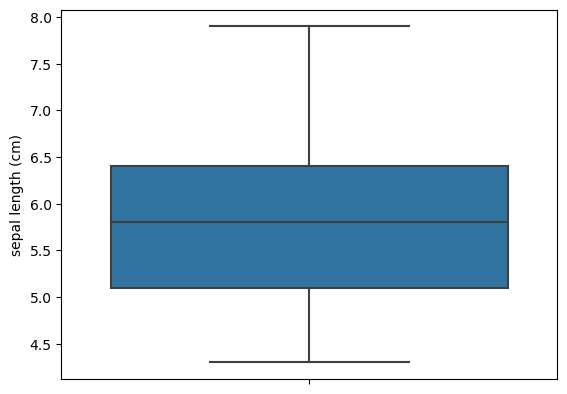

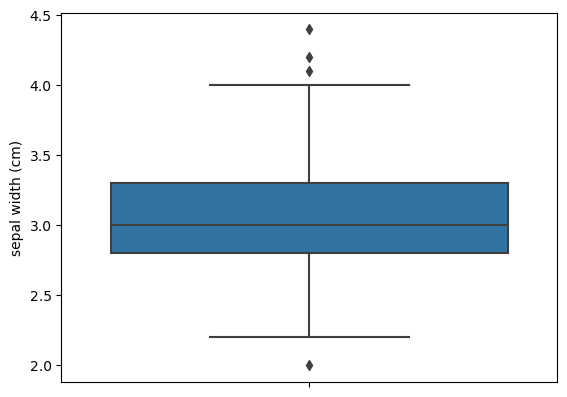

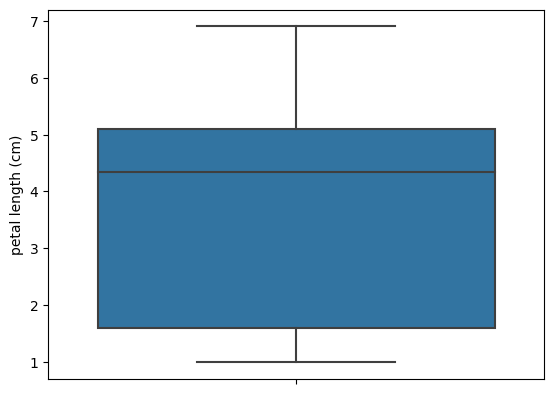

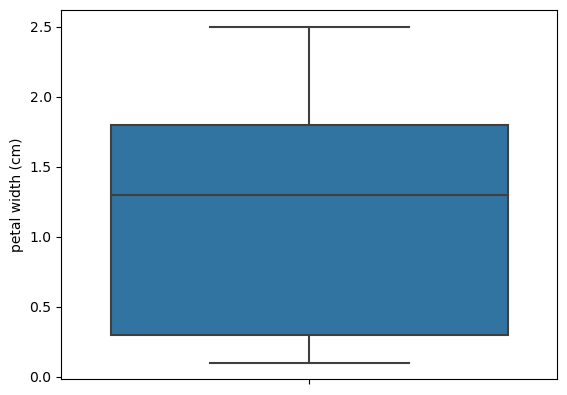

In [7]:
# To find outliers
cols = df.columns[0:-1]
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

In [8]:
# To remove outliers from 'sepal width (cm)'
q1 = df['sepal width (cm)'].quantile(0.25)
q3 = df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
df = df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]
df.shape # To find out the number of rows and column after outlier treatment

(146, 5)

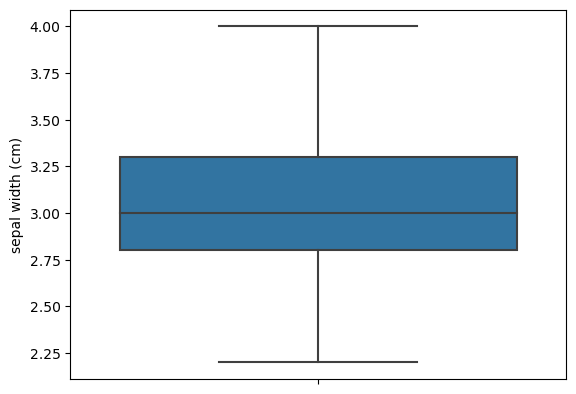

In [9]:
# Blocplot for sepal width (cm) after outlier treatment
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

In [10]:
# Splitting the data into train and test sets
X = df.drop("Species",axis=1)
y = df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 1)

In [11]:
# Defining an object for DTC and fitting for whole dataset
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1 )
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

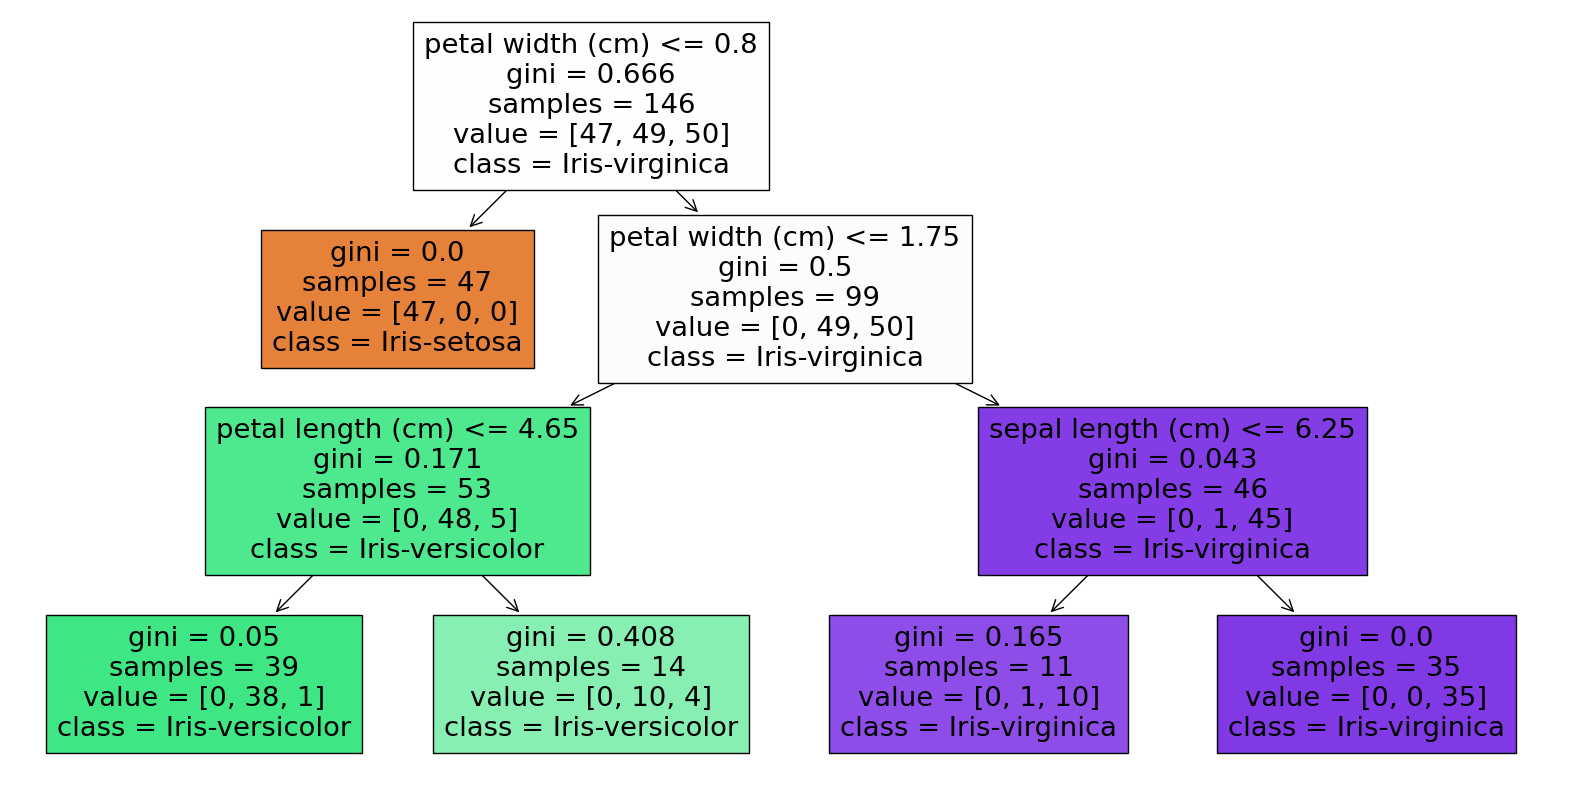

In [13]:
# Plotting of decission tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=features, class_names=dt.classes_, filled=True)
plt.show()


In [14]:
# Defining an object for DTC and fitting for train dataset
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [15]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.9545454545454546


In [16]:
#Classification for test before hyperparameter tuning
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.95        44
      macro avg       0.96      0.96      0.95        44
   weighted avg       0.96      0.95      0.95        44



In [17]:
# Hyperparameter Tuning of DTC

dt = DecisionTreeClassifier(random_state=1)

params = {'max_depth' : [2,3,4,5],
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5]}

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [18]:
# Passing best parameter for the Hyperparameter Tuning
dt = DecisionTreeClassifier(**gsearch.best_params_, random_state=1)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

In [19]:
print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_pred))

Confusion Matrix - Train: 
 [[32  0  0]
 [ 0 33  1]
 [ 0  0 36]]

 Confusion Matrix - Test: 
 [[15  0  0]
 [ 0 13  2]
 [ 0  0 14]]


In [20]:
#Classification for test after hyperparameter tuning
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.95        44
      macro avg       0.96      0.96      0.95        44
   weighted avg       0.96      0.95      0.95        44



In [21]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  0.9901960784313726
Accuracy of Decision Tree-Test:  0.9545454545454546


In [23]:
import warnings
warnings.filterwarnings("ignore")

new_data = [[6.8, 3.2, 5.9, 2.3]]

predicted_species = dt.predict(new_data)

print(f"The predicted species for the input data is: {predicted_species[0]}")

The predicted species for the input data is: Iris-virginica
